In [31]:
import generate_data

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import liveplot
import torch.optim as optim
%matplotlib notebook
from caption_model import *
from data_imports import *
glove = load_embeddings()
stops = load_stopwords()

elapsed 23.29873490333557s


In [6]:
def normalizeNP(x):
    return x / np.linalg.norm(x)

In [7]:
def normalizeTORCH(x):
    return x / torch.sqrt(torch.sum(torch.pow(x, 2)))

In [8]:
from pickle import load
data = load(open('resnet18_features_train.pkl', 'rb'))

In [27]:
trainDat = generate_data.generate_good_bad()

dict

In [10]:
class Net(nn.Module):
    
    def __init__(self, dim_input = 512, dim_output = 50):
        
        super(Net, self).__init__()
        
        self.dense = nn.Linear(dim_input, dim_output)
        
    def forward(self, x):
        
        return self.dense(x)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity as accuracy

In [17]:
loss = torch.nn.MarginRankingLoss()

tensor(1.)

In [18]:
model = Net()

optimizer = optim.Adam(model.parameters())

<IPython.core.display.Javascript object>


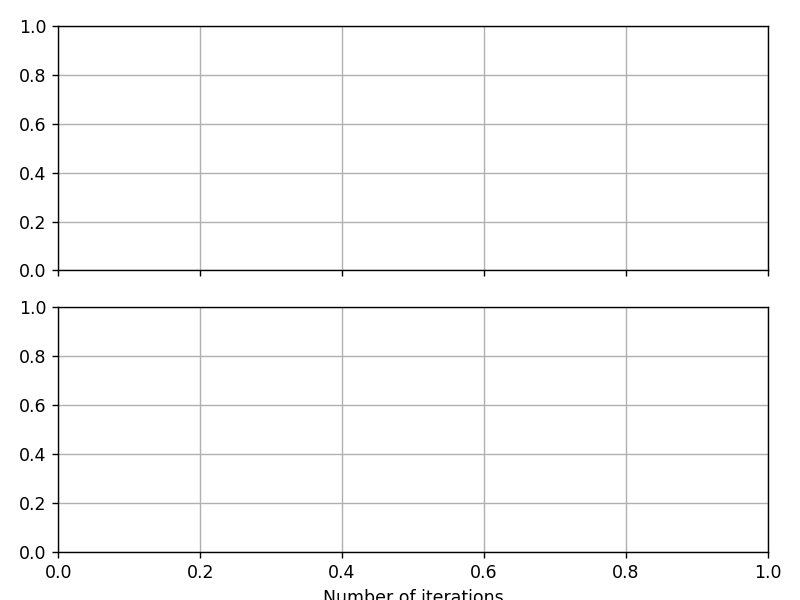

In [11]:
plotter, fig, ax = liveplot.create_plot(["loss", "accuracy"], refresh=5)

In [30]:
plotevery = 500
for k in range(100000):
    
    truth, good, bad = genData()
    
    bad = torch.abs(model(bad) - truth)
    goodish = model(good)
    
    good = torch.abs(goodish - truth)
    
    lossNum = loss(good, bad, -1 * torch.ones(len(bad)))
    
    lossNum.backward()
    optimizer.step()
    
    model.zero_grad()
    
    acc = accuracy(goodish, truth)
    
    plotter.set_train_batch({"loss":lossNum.item(), "accuracy":acc}, batch_size=1, plot=False)
    
    if k % plotevery == 0 and k > 0:
        plotter.plot_train_epoch()

0.61182678